In [2]:
# Yelp reviews classification with advanced ML

### Topics covered in this notebook

- **Tokenization**: breaking text into tokens (words, sentences, n-grams)
- **Stopword removal**: a/an/the
- **Stemming and lemmatization**: root word
- **TF-IDF**: word importance
- **Spelling correction**: "New York City"
- **Language detection**: "translate this page"
- **Machine learning**

## 1: Reading in the Yelp Reviews

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
import nltk
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [64]:
yelp = pd.read_csv('yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [65]:
yelp.shape

(10000, 10)

In [66]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
#yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]
yelp_best_worst = yelp

In [67]:
yelp_best_worst.shape

(10000, 10)

In [68]:
# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars

In [69]:
# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## 2: Tokenization

- **What:** Separate text into units such as sentences or words
- **Why:** Gives structure to previously unstructured text
- **Notes:** Relatively easy with English language text, not easy with some languages

In [70]:
X_train.shape

(7500,)

In [71]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer(stop_words = 'english')

In [72]:
#Tokenisation
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [77]:
len(vect.vocabulary_)

25496

In [78]:
#Vectorisation
X_train_dtm = vect.transform(X_train)

In [79]:
X_train_dtm

<7500x25496 sparse matrix of type '<class 'numpy.int64'>'
	with 378882 stored elements in Compressed Sparse Row format>

In [80]:
type(X_train_dtm)

scipy.sparse.csr.csr_matrix

In [81]:
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [82]:
demo = pd.DataFrame(X_train_dtm.toarray())
demo.columns = vect.get_feature_names()
demo

,00,000,007,00a,00am,00pm,01,02,04,05,...,zur,zuzu,zuzus,zweigel,zwiebel,zy,zzed,zzzzzzzzzzzzzzzzz,école,òc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
X_test_dtm = vect.transform(X_test)

In [84]:
X_test_dtm

<2500x25496 sparse matrix of type '<class 'numpy.int64'>'
	with 119863 stored elements in Compressed Sparse Row format>

In [85]:
demotest = pd.DataFrame(X_test_dtm.toarray())
demotest.columns = vect.get_feature_names()
demotest

,00,000,007,00a,00am,00pm,01,02,04,05,...,zur,zuzu,zuzus,zweigel,zwiebel,zy,zzed,zzzzzzzzzzzzzzzzz,école,òc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [86]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2),stop_words='english',min_df=3,max_df=100,lowercase=True)

In [87]:
X_train_dtm = vect.fit_transform(X_train)

In [88]:
X_train_dtm.shape

(7500, 28094)

In [89]:
# last 50 features
print(vect.get_feature_names()[-200:])

['ya know', 'ya later', 'yakisoba', 'yam', 'yams', 'yard', 'yard house', 'yards', 'yards away', 'yasu', 'yasu really', 'yay', 'yay fan', 'yc', 'yea', 'yeah know', 'yeah like', 'yeah ll', 'yeah place', 'yeah said', 'yeah yeah', 'year ago', 'year anniversary', 'year day', 'year did', 'year eve', 'year got', 'year just', 'year long', 'year make', 'year old', 'year olds', 'year round', 'year went', 'yearly', 'yearn', 'years ago', 'years bad', 'years come', 'years day', 'years did', 'years finally', 'years food', 'years going', 'years good', 'years great', 'years just', 'years know', 'years later', 'years lived', 'years living', 'years love', 'years old', 'years past', 'years really', 'years said', 'years staff', 'years tempe', 'years used', 'years ve', 'years years', 'yell', 'yelled', 'yelling', 'yellow', 'yellow cheese', 'yellow curry', 'yellow tail', 'yellowtail', 'yelp app', 'yelp best', 'yelp check', 'yelp com', 'yelp decided', 'yelp event', 'yelp like', 'yelp review', 'yelp reviews', 

**Predicting the star rating:**

In [90]:
# include 1-grams and 2-grams
vect = CountVectorizer(stop_words='english')

In [91]:
# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(7500, 25496)
(2500, 25496)


In [92]:
# use Naive Bayes to predict the star rating
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
nb = MultinomialNB()
#nb = LogisticRegression()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [93]:
y_pred_class = nb.predict(X_test_dtm)
print("Number of Features")
print(X_train_dtm.shape[1])
print("Training Accuracy")
print(nb.score(X_train_dtm,y_train))
print("Testing Accuracy")
print(nb.score(X_test_dtm,y_test))
y_pred_class = nb.predict(X_test_dtm)
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_class))
print("Classifcation Report")
print(classification_report(y_test,y_pred_class))

Number of Features
25496
Training Accuracy
0.7914666666666667
Testing Accuracy
0.4672
Confusion Matrix
[[ 56  20  24  59  26]
 [ 23  21  38 130  22]
 [  6   6  37 270  46]
 [  7   1  16 635 225]
 [ 10   4  10 389 419]]
Classifcation Report
              precision    recall  f1-score   support

           1       0.55      0.30      0.39       185
           2       0.40      0.09      0.15       234
           3       0.30      0.10      0.15       365
           4       0.43      0.72      0.54       884
           5       0.57      0.50      0.53       832

    accuracy                           0.47      2500
   macro avg       0.45      0.34      0.35      2500
weighted avg       0.46      0.47      0.43      2500



In [98]:
from sklearn.metrics import precision_score,recall_score,f1_score
print(recall_score(y_test,y_pred_class,average=None))
print(recall_score(y_test,y_pred_class,average='macro'))
print(recall_score(y_test,y_pred_class,average='weighted'))

[0.3027027  0.08974359 0.10136986 0.71832579 0.50360577]
0.3431495433091928
0.4672


In [95]:
classification_report(y_test,y_pred_class)

'              precision    recall  f1-score   support\n\n           1       0.55      0.30      0.39       185\n           2       0.40      0.09      0.15       234\n           3       0.30      0.10      0.15       365\n           4       0.43      0.72      0.54       884\n           5       0.57      0.50      0.53       832\n\n    accuracy                           0.47      2500\n   macro avg       0.45      0.34      0.35      2500\nweighted avg       0.46      0.47      0.43      2500\n'

In [80]:
y_pred_class

array([5, 1, 5, ..., 5, 1, 5], dtype=int64)

In [81]:
X_test

3922    Looking a cutting edge, wanting the best for e...
8379    Greatness in the form of food, just like the o...
4266    The Flower Studio far exceeded my expectations...
5577        So yummy! Strange combination but great place
537     I've been hearing about these cheesecakes from...
                              ...                        
6846    Honey jalapeño chicken lollipops and sweet pot...
1588                   probably my favorite restaurant :)
8451    A philosophical elder of my profession commonl...
7903    First, I'm sorry this review is lengthy, but i...
8255    You speak Italian to me and provide mouth wate...
Name: text, Length: 1022, dtype: object

In [82]:
# calculate null accuracy
y_test_binary = np.where(y_test==5, 1, 0)
max(y_test_binary.mean(), 1 - y_test_binary.mean())

0.8199608610567515

In [83]:
# define a function that accepts a vectorizer and calculates the accuracy
from sklearn.metrics import confusion_matrix,classification_report
def tokenize_test(vect):
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    print ('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print("Training Accuracy")
    print(nb.score(X_train_dtm,y_train))
    print("Testing Accuracy")
    print(nb.score(X_test_dtm,y_test))
    print("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred_class))
    print("Classifcation Report")
    print(classification_report(y_test,y_pred_class))

In [84]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 1))
tokenize_test(vect)

Features:  16825
Training Accuracy
0.972911227154047
Testing Accuracy
0.9187866927592955
Confusion Matrix
[[126  58]
 [ 25 813]]
Classifcation Report
              precision    recall  f1-score   support

           1       0.83      0.68      0.75       184
           5       0.93      0.97      0.95       838

    accuracy                           0.92      1022
   macro avg       0.88      0.83      0.85      1022
weighted avg       0.92      0.92      0.92      1022



In [40]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2),min_df=2,max_df=100)
tokenize_test(vect)

Features:  43403
Training Accuracy
0.9931462140992167
Testing Accuracy
0.9363992172211351
Confusion Matrix
[[147  37]
 [ 28 810]]
Classifcation Report
              precision    recall  f1-score   support

           1       0.84      0.80      0.82       184
           5       0.96      0.97      0.96       838

    accuracy                           0.94      1022
   macro avg       0.90      0.88      0.89      1022
weighted avg       0.94      0.94      0.94      1022



## 3: Stopword Removal

- **What:** Remove common words that will likely appear in any text
- **Why:** They don't tell you much about your text

In [154]:
# show vectorizer options
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=100, max_features=None, min_df=2,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

- **stop_words:** string {'english'}, list, or None (default)
- If 'english', a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If None, no stop words will be used. 

In [155]:
vect = CountVectorizer(stop_words='english')

In [156]:
# set of stop words
print(vect.get_stop_words())

frozenset({'go', 'once', 'mine', 'may', 'yourself', 'whose', 'ever', 'take', 'those', 'whereafter', 'something', 'themselves', 'whereupon', 'never', 'which', 'above', 'among', 'these', 'can', 'they', 'therefore', 'hence', 'meanwhile', 're', 'give', 'con', 'such', 'neither', 'further', 'her', 'therein', 'forty', 'into', 'same', 'herein', 'what', 'about', 'and', 'should', 'get', 'hundred', 'not', 'up', 'him', 'mostly', 'whence', 'latterly', 'fire', 'eleven', 'elsewhere', 'third', 'their', 'fifteen', 'under', 'that', 'un', 'fill', 'must', 'against', 'along', 'toward', 'except', 'due', 'top', 'least', 'now', 'please', 'name', 'former', 'serious', 'bottom', 'thick', 'either', 'she', 'became', 'has', 'everywhere', 'twenty', 'sometimes', 'six', 'often', 'others', 'becoming', 'almost', 'whither', 'being', 'every', 'much', 'were', 'without', 'part', 'whatever', 'twelve', 'two', 'everything', 'someone', 'while', 'whereas', 'first', 'rather', 'our', 'cannot', 'upon', 'whenever', 'each', 'could', 

In [157]:
# remove English stop words
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  16528
Training Accuracy
0.9758485639686684
Testing Accuracy
0.9158512720156555
Confusion Matrix
[[124  60]
 [ 26 812]]
Classifcation Report
              precision    recall  f1-score   support

           1       0.83      0.67      0.74       184
           5       0.93      0.97      0.95       838

    accuracy                           0.92      1022
   macro avg       0.88      0.82      0.85      1022
weighted avg       0.91      0.92      0.91      1022



In [158]:
# without stopwords, dtm size
vect = CountVectorizer()
vect.fit(X_train)
vect.transform(X_train)

<3064x16825 sparse matrix of type '<class 'numpy.int64'>'
	with 237720 stored elements in Compressed Sparse Row format>

In [159]:
# with stopwords, dtm size
vect = CountVectorizer(stop_words='english')
vect.fit(X_train)
vect.transform(X_train)

<3064x16528 sparse matrix of type '<class 'numpy.int64'>'
	with 143743 stored elements in Compressed Sparse Row format>

In [160]:
my_additional_stop_words = ['abcd']

In [161]:
from sklearn.feature_extraction import text 
my_stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

In [162]:
# with stopwords, dtm size
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(X_train)
vect.transform(X_train)

<3064x16528 sparse matrix of type '<class 'numpy.int64'>'
	with 143743 stored elements in Compressed Sparse Row format>

In [163]:
# remove updated stop words 
vect = CountVectorizer(stop_words=my_stop_words)
tokenize_test(vect)

Features:  16528
Training Accuracy
0.9758485639686684
Testing Accuracy
0.9158512720156555
Confusion Matrix
[[124  60]
 [ 26 812]]
Classifcation Report
              precision    recall  f1-score   support

           1       0.83      0.67      0.74       184
           5       0.93      0.97      0.95       838

    accuracy                           0.92      1022
   macro avg       0.88      0.82      0.85      1022
weighted avg       0.91      0.92      0.91      1022



## 4: Other CountVectorizer Options

- **max_features:** int or None, default=None
- If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [164]:
# remove English stop words and only keep 100 features
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

Features:  100
Training Accuracy
0.8789164490861618
Testing Accuracy
0.8698630136986302
Confusion Matrix
[[108  76]
 [ 57 781]]
Classifcation Report
              precision    recall  f1-score   support

           1       0.65      0.59      0.62       184
           5       0.91      0.93      0.92       838

    accuracy                           0.87      1022
   macro avg       0.78      0.76      0.77      1022
weighted avg       0.87      0.87      0.87      1022



In [165]:
# all 100 features
print(vect.get_feature_names())

['amazing', 'area', 'atmosphere', 'awesome', 'bad', 'bar', 'best', 'better', 'big', 'came', 'cheese', 'chicken', 'clean', 'coffee', 'come', 'day', 'definitely', 'delicious', 'did', 'didn', 'dinner', 'don', 'eat', 'excellent', 'experience', 'favorite', 'feel', 'food', 'free', 'fresh', 'friendly', 'friends', 'going', 'good', 'got', 'great', 'happy', 'home', 'hot', 'hour', 'just', 'know', 'like', 'little', 'll', 'location', 'long', 'looking', 'lot', 'love', 'lunch', 'make', 'meal', 'menu', 'minutes', 'need', 'new', 'nice', 'night', 'order', 'ordered', 'people', 'perfect', 'phoenix', 'pizza', 'place', 'pretty', 'prices', 'really', 'recommend', 'restaurant', 'right', 'said', 'salad', 'sandwich', 'sauce', 'say', 'service', 'staff', 'store', 'sure', 'table', 'thing', 'things', 'think', 'time', 'times', 'took', 'town', 'tried', 'try', 've', 'wait', 'want', 'way', 'went', 'wine', 'work', 'worth', 'years']


In [166]:
# include 1-grams and 2-grams, and limit the number of features
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_test(vect)

Features:  100000
Training Accuracy
0.9924934725848564
Testing Accuracy
0.8855185909980431
Confusion Matrix
[[ 72 112]
 [  5 833]]
Classifcation Report
              precision    recall  f1-score   support

           1       0.94      0.39      0.55       184
           5       0.88      0.99      0.93       838

    accuracy                           0.89      1022
   macro avg       0.91      0.69      0.74      1022
weighted avg       0.89      0.89      0.87      1022



- **min_df:** float in range [0.0, 1.0] or int, default=1
- When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts.

In [167]:
# include 1-grams and 2-grams, and only include terms that appear at least 2 times
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
tokenize_test(vect)

Features:  43957
Training Accuracy
0.9895561357702349
Testing Accuracy
0.9324853228962818
Confusion Matrix
[[137  47]
 [ 22 816]]
Classifcation Report
              precision    recall  f1-score   support

           1       0.86      0.74      0.80       184
           5       0.95      0.97      0.96       838

    accuracy                           0.93      1022
   macro avg       0.90      0.86      0.88      1022
weighted avg       0.93      0.93      0.93      1022



##  5: Introduction to TextBlob

TextBlob: "Simplified Text Processing"

In [ ]:
# print the first review
print (yelp_best_worst.text[0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [ ]:
# save it as a TextBlob object
review = TextBlob(yelp_best_worst.text[0])

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# list the words
review.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [ ]:
# list the sentences
review.sentences

[Sentence("My wife took me here on my birthday for breakfast and it was excellent."),
 Sentence("The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure."),
 Sentence("Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning."),
 Sentence("It looked like the place fills up pretty quickly so the earlier you get here the better."),
 Sentence("Do yourself a favor and get their Bloody Mary."),
 Sentence("It was phenomenal and simply the best I've ever had."),
 Sentence("I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it."),
 Sentence("It was amazing."),
 Sentence("While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious."),
 Sentence("It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete."),
 Sentence("It was the best "toast" I've ever had."),


In [ ]:
# some string methods are available
review.lower()

TextBlob("my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.

do yourself a favor and get their bloody mary.  it was phenomenal and simply the best i've ever had.  i'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.

while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best "toast" i've ever had.

anyway, i can't wait to go back!")

##  6: Stemming and Lemmatization

**Stemming:**

- **What:** Reduce a word to its base/stem/root form
- **Why:** Often makes sense to treat related words the same way
- **Notes:**
    - Uses a "simple" and fast rule-based approach
    - Stemmed words are usually not shown to users (used for analysis/indexing)
    - Some search engines treat words with the same stem as synonyms

In [ ]:
# initialize stemmer
stemmer = SnowballStemmer('english')

In [ ]:
# stem each word
print ([stemmer.stem(word) for word in review.words])

['my', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excel', 'the', 'weather', 'was', 'perfect', 'which', 'made', 'sit', 'outsid', 'overlook', 'their', 'ground', 'an', 'absolut', 'pleasur', 'our', 'waitress', 'was', 'excel', 'and', 'our', 'food', 'arriv', 'quick', 'on', 'the', 'semi-busi', 'saturday', 'morn', 'it', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretti', 'quick', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'bloodi', 'mari', 'it', 'was', 'phenomen', 'and', 'simpli', 'the', 'best', 'i', 've', 'ever', 'had', 'i', "'m", 'pretti', 'sure', 'they', 'onli', 'use', 'ingredi', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'it', 'was', 'amaz', 'while', 'everyth', 'on', 'the', 'menu', 'look', 'excel', 'i', 'had', 'the', 'white', 'truffl', 'scrambl', 'egg', 'veget', 'skillet', 'and', 'it', 'was', 'tasti', 'and', 'delic

**Lemmatization**

- **What:** Derive the canonical form ('lemma') of a word
- **Why:** Can be better than stemming
- **Notes:** Uses a dictionary-based approach (slower than stemming)

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# assume every word is a noun
print ([word.lemmatize() for word in review.words])

['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'wa', 'excellent', 'The', 'weather', 'wa', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'wa', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'wa', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredient', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'wa', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'look', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'egg', 'vegetable', 'skill

In [ ]:
# assume every word is a verb
print ([word.lemmatize(pos='v') for word in review.words])

['My', 'wife', 'take', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'be', 'excellent', 'The', 'weather', 'be', 'perfect', 'which', 'make', 'sit', 'outside', 'overlook', 'their', 'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'be', 'excellent', 'and', 'our', 'food', 'arrive', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'be', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'have', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'be', 'amaze', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'look', 'excellent', 'I', 'have', 'the', 'white', 'truffle', 'scramble', 'egg', 'vegetable', 'skillet', 'and'

In [ ]:
# define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    text = text.lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [ ]:
split_into_lemmas

<function __main__.split_into_lemmas>

In [ ]:
# use split_into_lemmas as the feature extraction function (WARNING: SLOW!)
vect = CountVectorizer(analyzer=split_into_lemmas,ngram_range=(1, 2),min_df=2)

In [ ]:
tokenize_test(vect)

Features:  7932
Training Accuracy
0.9673629242819843
Testing Accuracy
0.9207436399217221
Confusion Matrix
[[149  35]
 [ 46 792]]
Classifcation Report
              precision    recall  f1-score   support

           1       0.76      0.81      0.79       184
           5       0.96      0.95      0.95       838

    accuracy                           0.92      1022
   macro avg       0.86      0.88      0.87      1022
weighted avg       0.92      0.92      0.92      1022



In [ ]:
vect = CountVectorizer()

In [ ]:
tokenize_test(vect)

Features:  16825
Training Accuracy
0.972911227154047
Testing Accuracy
0.9187866927592955
Confusion Matrix
[[126  58]
 [ 25 813]]
Classifcation Report
              precision    recall  f1-score   support

           1       0.83      0.68      0.75       184
           5       0.93      0.97      0.95       838

    accuracy                           0.92      1022
   macro avg       0.88      0.83      0.85      1022
weighted avg       0.92      0.92      0.92      1022



In [ ]:
# last 50 features
print (vect.get_feature_names()[-50:])

['yyyyy', 'z11', 'za', 'zabba', 'zach', 'zam', 'zanella', 'zankou', 'zappos', 'zatsiki', 'zen', 'zero', 'zest', 'zexperience', 'zha', 'zhou', 'zia', 'zihuatenejo', 'zilch', 'zin', 'zinburger', 'zinburgergeist', 'zinc', 'zinfandel', 'zing', 'zip', 'zipcar', 'zipper', 'zippers', 'zipps', 'ziti', 'zoe', 'zombi', 'zombies', 'zone', 'zones', 'zoning', 'zoo', 'zoyo', 'zucca', 'zucchini', 'zuchinni', 'zumba', 'zupa', 'zuzu', 'zwiebel', 'zzed', 'éclairs', 'école', 'ém']


## 7: Term Frequency-Inverse Document Frequency (TF-IDF)

- **What:** Computes "relative frequency" that a word appears in a document compared to its frequency across all documents
- **Why:** More useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents)
- **Notes:** Used for search engine scoring, text summarization, document clustering

In [ ]:
# example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [ ]:
# Term Frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [ ]:
# Document Frequency
vect = CountVectorizer(binary=True)
df = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1, 6), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


In [ ]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


## Classify Yelp Review with TFIDF?

1. Separate data into train and test

2. Create DTM using TFIDF

3. Build classification model with Naive Bayes

4. Calculate classification score

5. Compare it with CountVectorizer

6. Lemmatization Vs. Stemming when using in TFIDF

## 9: Sentiment Analysis

In [ ]:
# save it as a TextBlob object
review = TextBlob(yelp_best_worst.text[0])

In [ ]:
print (review)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [ ]:
# polarity ranges from -1 (most negative) to 1 (most positive)
review.sentiment.polarity

0.40246913580246907

In [ ]:
# understanding the apply method
yelp['length'] = yelp.text.apply(len)
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889


In [ ]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
# create a new DataFrame column for sentiment (WARNING: SLOW!)
yelp['sentiment'] = yelp.text.apply(detect_sentiment)

In [ ]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,0.402469
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,0.229773
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76,0.566667
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419,0.608646
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469,0.468125


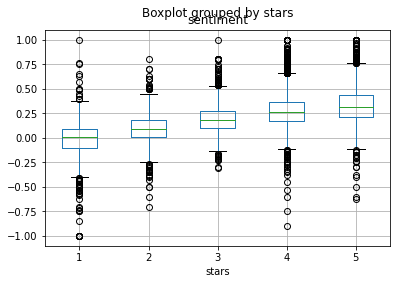

In [ ]:
# box plot of sentiment grouped by stars
yelp.boxplot(column='sentiment', by='stars')

In [ ]:
onestar = yelp[yelp['stars']==1]
onestar.describe()

,stars,cool,useful,funny,length,sentiment
count,749.0,749.000000,749.000000,749.000000,749.000000,749.000000
mean,1.0,0.576769,1.604806,1.056075,826.515354,-0.017906
std,0.0,1.474759,2.302354,2.480309,742.929304,0.210476
min,1.0,0.000000,0.000000,0.000000,11.000000,-1.000000
25%,1.0,0.000000,0.000000,0.000000,315.000000,-0.103379
50%,1.0,0.000000,1.000000,0.000000,600.000000,0.008523
75%,1.0,1.000000,2.000000,1.000000,1075.000000,0.094707
max,1.0,17.000000,20.000000,30.000000,4618.000000,1.000000


In [ ]:
onestar[onestar['sentiment']==1].values

array([['iHmfkYeEsIxbAqEj3dloQQ', '2012-07-03', 'N_hL1-fyunhVpDDX6fz9Sg',
        1,
        "The owner has changed hands & this place isn't what it used to be.  If you want up to date paper & quality product...go to Scrap Happy OR Crop Girls!",
        'review', 'HY9A-ShZQ1MvdFvEhNY4LQ', 0, 1, 0, 149, 1.0]],
      dtype=object)

In [ ]:
# reviews with most positive sentiment
yelp[yelp.sentiment == 1].text.head()

254    Our server Gary was awesome. Food was amazing....
347    3 syllables for this place. \nA-MAZ-ING!\n\nTh...
420                                    LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as C...
679                                     Excellent burger
Name: text, dtype: object

In [ ]:
# reviews with most negative sentiment
yelp[yelp.sentiment == -1].text.head()

773     This was absolutely horrible. I got the suprem...
1517                  Nasty workers and over priced trash
3266    Absolutely awful... these guys have NO idea wh...
4766                                       Very bad food!
5812        I wouldn't send my worst enemy to this place.
Name: text, dtype: object

In [ ]:
# widen the column display
pd.set_option('max_colwidth', 500)

In [ ]:
# negative sentiment in a 5-star review
yelp[(yelp.stars == 5) & (yelp.sentiment < -0.3)].head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
390,106JT5p8e8Chtd0CZpcARw,2009-08-06,KowGVoP_gygzdSu6Mt3zKQ,5,"RIP AZ Coffee Connection. :( I stopped by two days ago unaware that they had closed. I am severely bummed. This place is irreplaceable! Damn you, Starbucks and McDonalds!",review,jKeaOrPyJ-dI9SNeVqrbww,1,0,0,175,-0.302083


In [ ]:
# positive sentiment in a 1-star review
yelp[(yelp.stars == 1) & (yelp.sentiment > 0.5)].head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
1781,53YGfwmbW73JhFiemNeyzQ,2012-06-22,Gi-4O3EhE175vujbFGDIew,1,If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating.,review,Hqgx3IdJAAaoQjvrUnbNvw,0,1,2,119,0.766667


In [ ]:
# reset the column display width
pd.reset_option('max_colwidth')

## 10: Adding Features to a Document-Term Matrix

In [ ]:
# create a DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

In [ ]:
# define X and y
feature_cols = ['text', 'sentiment', 'cool', 'useful', 'funny']
X = yelp_best_worst[feature_cols]
y = yelp_best_worst.stars

In [ ]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# use CountVectorizer with text column only
vect = CountVectorizer()

In [ ]:
X_train_dtm = vect.fit_transform(X_train.text)

In [ ]:
X_test_dtm = vect.transform(X_test.text)

In [ ]:
print (X_train_dtm.shape)
print (X_test_dtm.shape)

(3064, 16825)
(1022, 16825)


In [ ]:
# shape of other four feature columns
X_train.drop('text', axis=1).shape

(3064, 4)

In [ ]:
# cast other feature columns to float and convert to a sparse matrix
extra = sp.sparse.csr_matrix(X_train.drop('text', axis=1).astype(float))
extra.shape

(3064, 4)

In [ ]:
# combine sparse matrices
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

(3064, 16829)

In [ ]:
# repeat for testing set
extra = sp.sparse.csr_matrix(X_test.drop('text', axis=1).astype(float))
X_test_dtm_extra = sp.sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(1022, 16829)

In [ ]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print (metrics.accuracy_score(y_test, y_pred_class))

0.9246575342465754


In [ ]:
# use logistic regression with all features
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print (metrics.accuracy_score(y_test, y_pred_class))

0.9207436399217221


## 11: Fun TextBlob Features

In [ ]:
# spelling correction
TextBlob('indai is good counrtey').correct()

TextBlob("india is good country")

In [ ]:
# spellcheck
Word('parot').spellcheck()

[('part', 0.9929478138222849), ('parrot', 0.007052186177715092)]

In [ ]:
# definitions
Word('bank').define('v')

['tip laterally',
 'enclose with a bank',
 'do business with a bank or keep an account at a bank',
 'act as the banker in a game or in gambling',
 'be in the banking business',
 'put into a bank account',
 'cover with ashes so to control the rate of burning',
 'have confidence or faith in']

In [ ]:
# language identification
TextBlob('Hola amigos').detect_language()

'es'

## Conclusion

- NLP is a gigantic field
- Understanding the basics broadens the types of data you can work with
- Simple techniques go a long way
- Use scikit-learn for NLP whenever possible